In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append('../..')


In [2]:
from mps.models import MPS
from mps.utils import two_phase_training

Loaded libmkl_rt.so for dgesvd


In [3]:
L=4
N=10000
source_root = "../../datasets/mps_sampled/ghz_plus_L=%d"%L
fname_angles = source_root + "_angles.npy"
fname_outcomes = source_root + "_outcomes.npy"
fname_state = source_root + "_state"

In [4]:
trsettings = dict(epochs=10,lr_scale=1e-3,lr_timescale=1000,s2_scale=0, s2_timescale=1000,
                     batch_size=512,cutoff=1e-3, max_sv=25,val_fraction=.2, early_stopping=False, 
                     mps_path=fname_state, samples_per_epoch=2)

In [5]:
numseed=25

Here, for a fixed dataset, train with various seeds on state known to be MPS-representable

In [6]:
losses = []
val_losses = []
fidelities=[]
s2 = []

In [7]:
for ii in range(numseed):
    print("Training on seed", ii)
    __, logdict, __ = two_phase_training(fname_outcomes, fname_angles, trsettings,
                                        N=N,numpy_seed=0,seed=ii,record_s2=True,verbose=False)
    losses.append(logdict['loss'])
    val_losses.append(logdict['val_loss'])
    fidelities.append(logdict['fidelity_mps'])

Training on seed 0
loading ground truth MPS from  ../../datasets/mps_sampled/ghz_plus_L=4_state
loading ground truth MPS from  ../../datasets/mps_sampled/ghz_plus_L=4_state
Training on seed 1
loading ground truth MPS from  ../../datasets/mps_sampled/ghz_plus_L=4_state
loading ground truth MPS from  ../../datasets/mps_sampled/ghz_plus_L=4_state
Training on seed 2
loading ground truth MPS from  ../../datasets/mps_sampled/ghz_plus_L=4_state
loading ground truth MPS from  ../../datasets/mps_sampled/ghz_plus_L=4_state
Training on seed 3
loading ground truth MPS from  ../../datasets/mps_sampled/ghz_plus_L=4_state
loading ground truth MPS from  ../../datasets/mps_sampled/ghz_plus_L=4_state
Training on seed 4
loading ground truth MPS from  ../../datasets/mps_sampled/ghz_plus_L=4_state
loading ground truth MPS from  ../../datasets/mps_sampled/ghz_plus_L=4_state
Training on seed 5
loading ground truth MPS from  ../../datasets/mps_sampled/ghz_plus_L=4_state
loading ground truth MPS from  ../../da

In [9]:
np.save("data/ghz_losses", losses)
np.save("data/ghz_val_losses", val_losses)
np.save("data/ghz_fidelities", fideli )

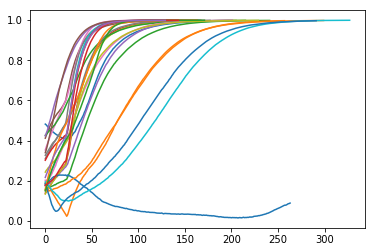

In [8]:
fig, ax = plt.subplots()
for ii in range(numseed):
    plt.plot(fidelities[ii])